In [1]:
%load_ext autoreload
%autoreload 2
import od.utils as od

import matplotlib.pyplot as plt
%matplotlib inline

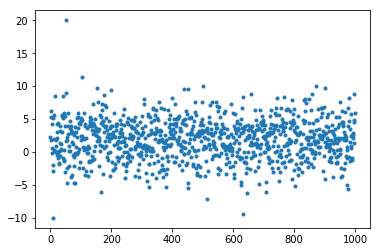

In [2]:
norm_data = od.norm_generate(1000, mean=2, std=3)
norm_data[50] = 20
norm_data[10] = -10
plt.plot(norm_data, '.');

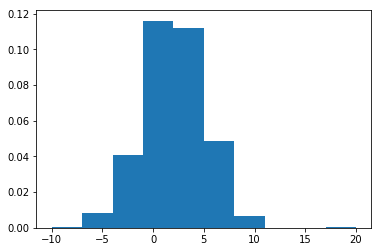

In [4]:
plt.hist(norm_data, density=True);

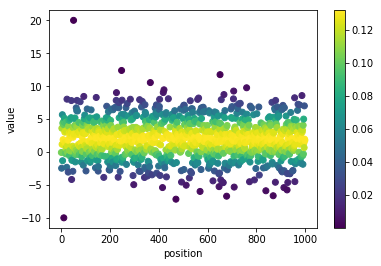

In [45]:
mean, std = od.norm_params(norm_data)
od.plot_by_probs(norm_data, mean, std)

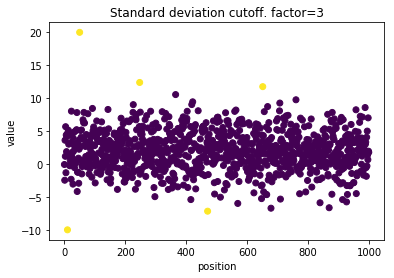

In [46]:
od.plot_outliers_std(norm_data)

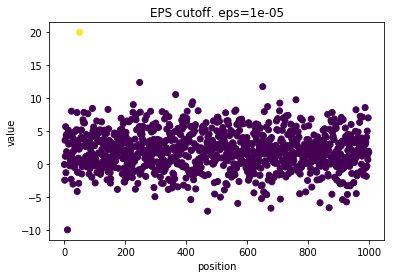

In [47]:
od.plot_outliers_eps(norm_data)

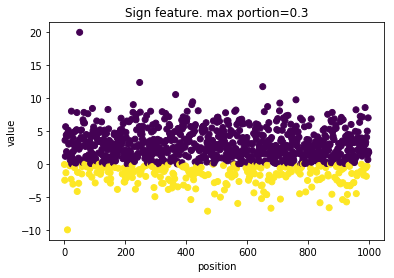

In [48]:
od.plot_outliers_sign(norm_data)

## Simple outliers dataset

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

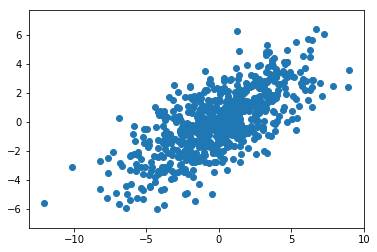

In [4]:
mean = [0, 0]
cov = [[10, 5],
       [5, 5]]
size = 700

gauss_x, gauss_y = np.random.multivariate_normal(mean, cov, size).T
plt.axis('equal')
plt.scatter(gauss_x, gauss_y);

In [61]:
df = pd.DataFrame(data={'A': gauss_x, 'B': gauss_y})

In [62]:
df.drop()

,A,B
0,2.755391,0.668183
1,0.467818,1.155925
2,-0.670515,-1.388655
3,-0.169732,-1.085860
4,-2.850037,-0.218551
5,-4.566460,-2.378544
6,-1.866065,-0.486472
7,0.699340,-1.980524
8,-2.025200,-1.865532
9,0.022055,-0.376933


In [70]:
pd.read_csv('datasets/test.csv').to_csv('datasets/test.csv', index_label='Index')

In [68]:
df.to_csv('datasets/2_gauss.csv', index_label='Index')

In [75]:
df.columns

Index(['A', 'B'], dtype='object')

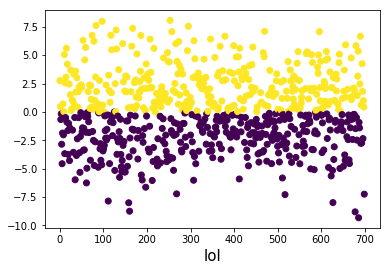

In [91]:
x = df['A']
y = df['B']

# Necessary data are received.

data = x
outliers_portion = 1

fig, axes = plt.subplots()

positive_indexes = np.array(list(enumerate(data)))[data > 0][:, 0].astype(int)
negative_indexes = np.array(list(enumerate(data)))[data < 0][:, 0].astype(int)
zeros_indexes = np.array(list(enumerate(data)))[data == 0][:, 0].astype(int)  # ???

outliers_indexes = list()

if len(positive_indexes) / len(data) < outliers_portion:
    outliers_indexes.extend(list(positive_indexes))
elif len(negative_indexes) / len(data) < outliers_portion:
    outliers_indexes.extend(list(negative_indexes))

colors = np.zeros(len(data))
colors[outliers_indexes] = np.ones(len(outliers_indexes))

# axes.title('Sign feature. max portion={}'.format(outliers_portion))
axes.scatter(np.arange(len(data)), data, c=colors)
axes.set_xlabel('lol', fontsize=15)
# axes.('position')
# axes.ylabel('value')
plt.show()